In [21]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [79]:
class LungsCovidDataset(Dataset):

    def __init__(self, csv_file, original_root_dir, cropped_root_dir, transform=None):
        self.labes_frame = pd.read_csv(csv_file)
        self.original_root_dir = original_root_dir
        self.cropped_root_dir = cropped_root_dir
        self.transform = transform

    def __len__(self):
        return len(self.labes_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()


        
        original_img_name = os.path.join(self.original_root_dir,
                                "img_" + str(self.labes_frame.iloc[idx, 0]) + ".png")
        cropped_img_name = os.path.join(self.cropped_root_dir,
                                "img_" + str(self.labes_frame.iloc[idx, 0]) + ".png")

        original_image = io.imread(original_img_name)
        cropped_image = io.imread(cropped_img_name)
        labels = self.labes_frame.iloc[idx, 1:]
        labels = np.array([labels]).reshape(-1, len(labels))
        sample = {'original_image': original_image, 'cropped_image': cropped_image, 'labels': labels}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [80]:
dataset = LungsCovidDataset("~/Downloads/data/train_answers.csv", "~/Downloads/data/train_images", "~/Downloads/data/train_lung_masks")

In [85]:
def show_original_image(original_image, cropped_image, labels):
    plt.imshow(original_image)
    # plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

In [86]:
def show_cropped_image(original_image, cropped_image, labels):
    plt.imshow(cropped_image)
    # plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

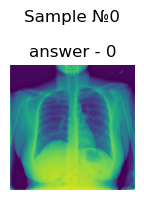

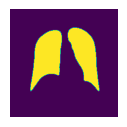

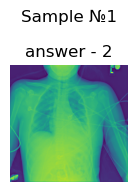

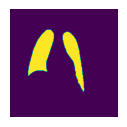

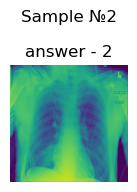

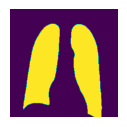

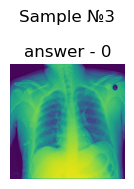

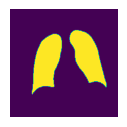

In [92]:
fig = plt.figure()

for i, sample in enumerate(dataset):
    # print(i, sample['original_image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(2, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample №{}\n\nanswer - {}'.format(i, sample["labels"][0][0]))
    ax.axis('off')
    show_original_image(**sample)
    plt.subplot(2, 4, i + 5).axis('off')
    show_cropped_image(**sample)
    if i == 3:
        plt.show()
        break